<a href="https://colab.research.google.com/github/nishant-out/Covid_Detection_Using_DeepLearning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image
import tensorflow as tf


#Loading Data

In [ ]:
# DataGenerators for image augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1/255, 
    horizontal_flip= True, zoom_range= 0.2, shear_range = 0.2
)
train_data = train_datagen.flow_from_directory(directory='/content/covid/train', 
                                               target_size=(256, 256), 
                                               batch_size=16,
                                               class_mode='binary')

Found 288 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/255
)
test_data = test_datagen.flow_from_directory(directory='/content/covid/val', 
                                               target_size=(256, 256), 
                                               batch_size=16,
                                               class_mode='binary')

Found 60 images belonging to 2 classes.


#CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', input_shape= (256,256,3)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate= 0.25))


model.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate= 0.25))


model.add(Conv2D(filters= 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate=0.5))  # For avoiding overfitting
model.add(Dense(units= 1, activation= 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 126, 126, 64)     0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [ ]:
model.fit_generator(train_data, steps_per_epoch= 8, epochs= 12, 
                    validation_steps=2,
                    validation_data= test_data
          )


<ipython-input-123-b0f10ecde231>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data, steps_per_epoch= 8, epochs= 12,


Epoch 1/12
8/8 [==============================] - 34s 4s/step - loss: 2.2252 - accuracy: 0.4766 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 2/12
8/8 [==============================] - 34s 4s/step - loss: 0.6854 - accuracy: 0.5312 - val_loss: 0.6852 - val_accuracy: 0.5312
Epoch 3/12
8/8 [==============================] - 33s 4s/step - loss: 0.5816 - accuracy: 0.7500 - val_loss: 0.3883 - val_accuracy: 0.9375
Epoch 4/12
8/8 [==============================] - 33s 4s/step - loss: 0.3943 - accuracy: 0.8281 - val_loss: 0.3250 - val_accuracy: 0.8750
Epoch 5/12
8/8 [==============================] - 33s 4s/step - loss: 0.3584 - accuracy: 0.8828 - val_loss: 0.1179 - val_accuracy: 0.9688
Epoch 6/12
8/8 [==============================] - 33s 4s/step - loss: 0.2821 - accuracy: 0.8828 - val_loss: 0.2109 - val_accuracy: 0.9062
Epoch 7/12
8/8 [==============================] - 33s 4s/step - loss: 0.3489 - accuracy: 0.8750 - val_loss: 0.2099 - val_accuracy: 0.9375
Epoch 8/12
8/8 [==================

(1, 256, 256, 3)

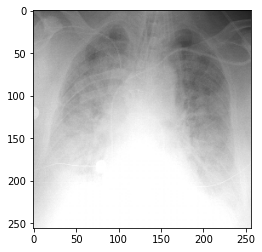

In [ ]:
path = "/content/covid/predict/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256,256,3))
img = tf.keras.preprocessing.image.img_to_array(img)/255

plt.imshow(img)
img = np.array([img])  # Convert single image to a batch.

img.shape

In [ ]:
# model.predict_classes(img)

(model.predict(img) > 0.5).astype("int32")

# predict_x=model.predict(img)
# np.argmax(predict_x,axis=1)

# train_data.class_indices

1/1 [==============================] - 0s 74ms/step


array([[0]], dtype=int32)